In [3]:
import pandas as pd
full_data = pd.read_csv('/kaggle/input/aaaaaaaaaa/DataHN.csv')


In [4]:
full_data['temperature_next_hour'] = full_data['temperature'].shift(-1)
# full_data['pressure_next_hour'] = full_data['pressure'].shift(-1)
# full_data['wind_speed_next_hour'] = full_data['wind_speed'].shift(-1)
# full_data['cloud_next_hour'] = full_data['cloud'].shift(-1)
full_data['humidity_next_hour'] = full_data['humidity'].shift(-1)
# full_data['dew_point_next_hour'] = full_data['dew_point'].shift(-1)
# full_data['sea_level_pressure_next_hour'] = full_data['sea_level_pressure'].shift(-1)
# full_data['wind_direction_next_hour'] = full_data['wind_direction'].shift(-1)
full_data['precipitation_next_hour'] = full_data['precipitation'].shift(-1)


full_data['datetime'] = pd.to_datetime(full_data['datetime'])

full_data['hour'] = full_data['datetime'].dt.hour
full_data['month'] = full_data['datetime'].dt.month
full_data['day'] = full_data['datetime'].dt.day

In [5]:
full_data = full_data.dropna()

In [6]:
import numpy as np

features = ['precipitation']

# Tạo danh sách để lưu kết quả tính toán
outlier_conditions = []

for col in features:
    Q1 = full_data[col].quantile(0.25)
    Q3 = full_data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Điều kiện phát hiện ngoại lai cho từng cột
    outlier_condition = ((full_data[col] < (Q1 - 1.5 * IQR)) | (full_data[col] > (Q3 + 1.5 * IQR)))
    outlier_conditions.append(outlier_condition)

combined_outlier_condition = np.logical_or.reduce(outlier_conditions)

# Tạo dữ liệu chứa các giá trị ngoại lai
data = full_data[combined_outlier_condition]

# Loại bỏ các giá trị ngoại lai
data_1 = full_data[~combined_outlier_condition]


In [7]:
# Loại bỏ ba cột cuối từ danh sách features
features = ['precipitation']

# Tạo danh sách để lưu kết quả tính toán
outlier_conditions = []

for col in features:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Điều kiện phát hiện ngoại lai cho từng cột
    outlier_condition = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))
    outlier_conditions.append(outlier_condition)

combined_outlier_condition = np.logical_or.reduce(outlier_conditions)

# Tạo dữ liệu chứa các giá trị ngoại lai
data_3 = data[combined_outlier_condition]

# Loại bỏ các giá trị ngoại lai
data_2 = data[~combined_outlier_condition]


In [8]:
data_3

,Unnamed: 0.1,Unnamed: 0,datetime,temperature,pressure,wind_speed,cloud,humidity,dew_point,sea_level_pressure,wind_direction,solar_rad,precipitation,precipitation_next_hour,temperature_next_hour,humidity_next_hour,hour,month,day
570,570,35627,2020-01-24 18:00:00,22.1,1011,3.00,75,94,21.0,1012,140,0,17.00,3.50,22.0,94.0,18,1,24
571,571,35628,2020-01-24 19:00:00,22.0,1012,3.00,75,94,21.0,1013,140,0,3.50,4.00,21.9,94.0,19,1,24
572,572,35629,2020-01-24 20:00:00,21.9,1012,2.66,83,94,20.9,1013,215,0,4.00,11.75,21.9,94.0,20,1,24
573,573,35630,2020-01-24 21:00:00,21.9,1013,2.33,91,94,20.8,1013,285,0,11.75,6.00,21.8,94.0,21,1,24
574,574,35631,2020-01-24 22:00:00,21.8,1013,2.00,100,94,20.8,1014,360,0,6.00,0.50,21.7,93.0,22,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32797,32797,67854,2023-09-28 13:00:00,25.0,1010,1.00,75,95,24.1,1011,230,525,3.25,1.25,25.2,95.0,13,9,28
32823,32823,67880,2023-09-29 15:00:00,28.8,1010,1.33,91,79,24.8,1010,305,143,4.00,1.00,29.4,75.0,15,9,29
33014,33014,68071,2023-10-07 14:00:00,27.6,1009,3.66,54,72,22.1,1010,140,603,4.50,2.00,27.3,72.0,14,10,7
33530,33530,68587,2023-10-29 02:00:00,24.2,1013,1.60,100,94,23.2,1014,230,0,3.50,3.00,24.0,95.0,2,10,29


In [9]:
import numpy as np
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

features = ['temperature', 'pressure', 'wind_speed', 'cloud', 'dew_point', 
           'sea_level_pressure', 'wind_direction', 'solar_rad', 'precipitation','humidity','hour','day',]
target = ['precipitation_next_hour', 'temperature_next_hour', 'humidity_next_hour']

# Split into test and train
train_data = data_1[data_1['datetime'] < '2023-02-01 00:00:00']
test_data = data_1[data_1['datetime'] >= '2023-02-01 00:00:00']
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Chia thêm tập train thành train và validation
X_train_full, X_val, y_train_full, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=12345
)

# Định nghĩa hàm tối ưu hóa tham số
def objective(trial):
    # Các tham số được tối ưu hóa
    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    # Khởi tạo mô hình với các tham số hiện tại
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=12345,
        n_jobs=-1
    )
    
    # Huấn luyện mô hình trên tập train_full
    model.fit(X_train_full, y_train_full)
    
    # Dự đoán trên tập validation
    y_val_pred = model.predict(X_val)
    
    # Tính toán MSE trên tập validation
    mse = mean_squared_error(y_val, y_val_pred)
    return mse

# Khởi tạo nghiên cứu Optuna
study = optuna.create_study(direction='minimize')

# Chạy tối ưu hóa với số vòng lặp nhất định
study.optimize(objective, n_trials=500)

# In ra tham số tốt nhất
print("Best parameters found: ", study.best_params)

# Đánh giá mô hình tốt nhất
best_model = RandomForestRegressor(
    n_estimators=study.best_params['n_estimators'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf'],
    max_features=study.best_params['max_features'],
    random_state=12345,
    n_jobs=-1
)
best_model.fit(X_train_full, y_train_full)
y_pred_best = best_model.predict(X_test)

# In ra các chỉ số đánh giá hồi quy
print("Evaluation on test set:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_best):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_best):.2f}")

[I 2024-12-03 23:41:01,367] A new study created in memory with name: no-name-a6872a1b-5788-48de-8ce8-529cc46e012a
[I 2024-12-03 23:41:02,279] Trial 0 finished with value: 2.402082872222404 and parameters: {'n_estimators': 102, 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 2.402082872222404.
[I 2024-12-03 23:41:03,981] Trial 1 finished with value: 2.1508075296544935 and parameters: {'n_estimators': 164, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 1 with value: 2.1508075296544935.
[I 2024-12-03 23:41:09,629] Trial 2 finished with value: 2.0757327755775266 and parameters: {'n_estimators': 153, 'max_depth': 32, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 2 with value: 2.0757327755775266.
[I 2024-12-03 23:41:18,122] Trial 3 finished with value: 2.098216503487498 and parameters: {'n_estimators': 291, 'max_depth': 31, 'min_sa

Best parameters found:  {'n_estimators': 187, 'max_depth': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Evaluation on test set:
Mean Squared Error (MSE): 2.67
Mean Absolute Error (MAE): 0.81


In [10]:
pred_1 = y_pred_best
test_data_1 = data_1[data_1['datetime'] >= '2023-02-01 00:00:00']
target = ['precipitation_next_hour_regression', 'temperature_next_hour_regression', 'humidity_next_hour_regression']
# Chuyển y_pred_best thành DataFrame
y_pred_df = pd.DataFrame(y_pred_best, columns=target)

# Gắn vào DataFrame hiện tại df
test_data_1 = pd.concat([test_data_1.reset_index(drop=True), y_pred_df.reset_index(drop=True)], axis=1)

In [11]:
features = ['temperature', 'pressure', 'wind_speed', 'cloud', 'dew_point', 
           'sea_level_pressure', 'wind_direction', 'solar_rad', 'precipitation','humidity','hour','day','month']
target = ['precipitation_next_hour', 'temperature_next_hour', 'humidity_next_hour']

# Split into test and train
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=12345)
train_data = data_2[data_2['datetime'] < '2023-02-01 00:00:00']
test_data = data_2[data_2['datetime'] >= '2023-02-01 00:00:00']
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]



from sklearn.model_selection import train_test_split

# Chia thêm tập train thành train và validation
X_train_full, X_val, y_train_full, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=12345
)

# Định nghĩa hàm tối ưu hóa tham số
def objective(trial):
    # Các tham số được tối ưu hóa
    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    # Khởi tạo mô hình với các tham số hiện tại
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=12345,
        n_jobs=-1
    )
    
    # Huấn luyện mô hình trên tập train_full
    model.fit(X_train_full, y_train_full)
    
    # Dự đoán trên tập validation
    y_val_pred = model.predict(X_val)
    
    # Tính toán MSE trên tập validation
    mse = mean_squared_error(y_val, y_val_pred)
    return mse

# Khởi tạo nghiên cứu Optuna
study = optuna.create_study(direction='minimize')

# Chạy tối ưu hóa với số vòng lặp nhất định
study.optimize(objective, n_trials=500)

# In ra tham số tốt nhất
print("Best parameters found: ", study.best_params)

# Đánh giá mô hình tốt nhất
best_model = RandomForestRegressor(
    n_estimators=study.best_params['n_estimators'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf'],
    max_features=study.best_params['max_features'],
    random_state=12345,
    n_jobs=-1
)
best_model.fit(X_train_full, y_train_full)
y_pred_best = best_model.predict(X_test)

# In ra các chỉ số đánh giá hồi quy
print("Evaluation on test set:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_best):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_best):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_best):.2f}")

[I 2024-12-03 23:45:45,392] A new study created in memory with name: no-name-634744bc-b450-48e7-bda2-551aab79b369
[I 2024-12-03 23:45:46,164] Trial 0 finished with value: 3.584186101889935 and parameters: {'n_estimators': 180, 'max_depth': 33, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 3.584186101889935.
[I 2024-12-03 23:45:47,343] Trial 1 finished with value: 3.345673531072567 and parameters: {'n_estimators': 259, 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 1 with value: 3.345673531072567.
[I 2024-12-03 23:45:48,187] Trial 2 finished with value: 3.43988113840244 and parameters: {'n_estimators': 191, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 1 with value: 3.345673531072567.
[I 2024-12-03 23:45:49,167] Trial 3 finished with value: 3.422253311965049 and parameters: {'n_estimators': 226, 'max_depth': 13, 'min_sampl

Best parameters found:  {'n_estimators': 176, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': None}
Evaluation on test set:
Mean Squared Error (MSE): 3.04
Mean Absolute Error (MAE): 1.00
R² Score: 0.66


In [12]:
pred_2 = y_pred_best
test_data_2 = data_2[data_2['datetime'] >= '2023-02-01 00:00:00']
target = ['precipitation_next_hour_regression', 'temperature_next_hour_regression', 'humidity_next_hour_regression']
# Chuyển y_pred_best thành DataFrame
y_pred_df = pd.DataFrame(y_pred_best, columns=target)

# Gắn vào DataFrame hiện tại df
test_data_2 = pd.concat([test_data_2.reset_index(drop=True), y_pred_df.reset_index(drop=True)], axis=1)

In [13]:
features = ['temperature', 'pressure', 'wind_speed', 'cloud', 'dew_point', 
           'sea_level_pressure', 'wind_direction', 'solar_rad', 'precipitation','humidity','hour','day','month']
target = ['precipitation_next_hour', 'temperature_next_hour', 'humidity_next_hour']

# Split into test and train
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=12345)
train_data = data_3[data_3['datetime'] < '2023-02-01 00:00:00']
test_data = data_3[data_3['datetime'] >= '2023-02-01 00:00:00']
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]



from sklearn.model_selection import train_test_split

# Chia thêm tập train thành train và validation
X_train_full, X_val, y_train_full, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=12345
)


def objective(trial):
    # Các tham số được tối ưu hóa
    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    # Khởi tạo mô hình với các tham số hiện tại
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=12345,
        n_jobs=-1
    )
    
    # Huấn luyện mô hình trên tập train_full
    model.fit(X_train_full, y_train_full)
    
    # Dự đoán trên tập validation
    y_val_pred = model.predict(X_val)
    
    # Tính toán MSE trên tập validation
    mse = mean_squared_error(y_val, y_val_pred)
    return mse

# Khởi tạo nghiên cứu Optuna
study = optuna.create_study(direction='minimize')

# Chạy tối ưu hóa với số vòng lặp nhất định
study.optimize(objective, n_trials=500)

# In ra tham số tốt nhất
print("Best parameters found: ", study.best_params)

# Đánh giá mô hình tốt nhất
best_model = RandomForestRegressor(
    n_estimators=study.best_params['n_estimators'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf'],
    max_features=study.best_params['max_features'],
    random_state=12345,
    n_jobs=-1
)
best_model.fit(X_train_full, y_train_full)
y_pred_best = best_model.predict(X_test)

# In ra các chỉ số đánh giá hồi quy
print("Evaluation on test set:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_best):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_best):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_best):.2f}")

[I 2024-12-03 23:48:33,311] A new study created in memory with name: no-name-23e7c94a-fd18-48f6-ae1f-559765ecb991
[I 2024-12-03 23:48:33,996] Trial 0 finished with value: 7.6154443390428135 and parameters: {'n_estimators': 259, 'max_depth': 16, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 7.6154443390428135.
[I 2024-12-03 23:48:34,845] Trial 1 finished with value: 7.911594287992691 and parameters: {'n_estimators': 293, 'max_depth': 35, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 0 with value: 7.6154443390428135.
[I 2024-12-03 23:48:35,524] Trial 2 finished with value: 7.699397455066728 and parameters: {'n_estimators': 227, 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 0 with value: 7.6154443390428135.
[I 2024-12-03 23:48:36,215] Trial 3 finished with value: 7.6296960852536015 and parameters: {'n_estimators': 259, 'max_depth': 30, 'min_sam

Best parameters found:  {'n_estimators': 139, 'max_depth': 49, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Evaluation on test set:
Mean Squared Error (MSE): 8.36
Mean Absolute Error (MAE): 1.84
R² Score: 0.64


In [14]:
pred_3 = y_pred_best
test_data_3 = data_3[data_3['datetime'] >= '2023-02-01 00:00:00']
target = ['precipitation_next_hour_regression', 'temperature_next_hour_regression', 'humidity_next_hour_regression']
# Chuyển y_pred_best thành DataFrame
y_pred_df = pd.DataFrame(y_pred_best, columns=target)

# Gắn vào DataFrame hiện tại df
test_data_3 = pd.concat([test_data_3.reset_index(drop=True), y_pred_df.reset_index(drop=True)], axis=1)

In [15]:
prediction = pd.concat([test_data_1, test_data_2, test_data_3])

In [16]:
prediction.to_csv('prediction.csv')

In [17]:
prediction

,Unnamed: 0.1,Unnamed: 0,datetime,temperature,pressure,wind_speed,cloud,humidity,dew_point,sea_level_pressure,...,precipitation,precipitation_next_hour,temperature_next_hour,humidity_next_hour,hour,month,day,precipitation_next_hour_regression,temperature_next_hour_regression,humidity_next_hour_regression
0,27048,62105,2023-02-01 00:00:00,15.8,1012,1.00,42,83,12.9,1013,...,0.00,0.00,15.5,85.0,0,2,1,0.082888,16.263102,84.155080
1,27049,62106,2023-02-01 01:00:00,15.5,1012,1.00,42,85,13.0,1013,...,0.00,0.00,15.0,88.0,1,2,1,0.038770,15.976471,87.197861
2,27050,62107,2023-02-01 02:00:00,15.0,1012,0.66,42,88,13.0,1012,...,0.00,0.00,14.5,91.0,2,2,1,0.034759,15.400535,89.106952
3,27051,62108,2023-02-01 03:00:00,14.5,1011,0.33,42,91,13.0,1012,...,0.00,0.00,14.0,94.0,3,2,1,0.038770,15.373797,90.278075
4,27052,62109,2023-02-01 04:00:00,14.0,1011,1.20,86,94,13.1,1012,...,0.00,0.00,13.8,89.0,4,2,1,0.125668,14.908556,93.721925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,32797,67854,2023-09-28 13:00:00,25.0,1010,1.00,75,95,24.1,1011,...,3.25,1.25,25.2,95.0,13,9,28,2.835986,25.591547,91.149940
172,32823,67880,2023-09-29 15:00:00,28.8,1010,1.33,91,79,24.8,1010,...,4.00,1.00,29.4,75.0,15,9,29,3.613354,27.336313,83.744065
173,33014,68071,2023-10-07 14:00:00,27.6,1009,3.66,54,72,22.1,1010,...,4.50,2.00,27.3,72.0,14,10,7,2.868431,28.188816,75.651953
174,33530,68587,2023-10-29 02:00:00,24.2,1013,1.60,100,94,23.2,1014,...,3.50,3.00,24.0,95.0,2,10,29,4.116727,23.632398,93.471703


In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Định nghĩa các hàm tính toán chỉ số
def mean_error(y_true, y_pred):
    return np.mean(y_true - y_pred)

def correlation_coefficient(y_true, y_pred):
    return np.corrcoef(y_true, y_pred)[0, 1]

def calculate_metrics(y_true, y_pred):
    me = mean_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    r = correlation_coefficient(y_true, y_pred)
    return [me, mae, rmse, r2, r]

# Các cột cần tính toán
y_test = ['precipitation_next_hour', 'temperature_next_hour', 'humidity_next_hour']
y_predic = ['precipitation_next_hour_regression', 'temperature_next_hour_regression', 'humidity_next_hour_regression']

# Các giờ cần tính toán
selected_hours = [1, 4, 7, 10, 13, 16, 19, 22]

# Lọc các dòng dữ liệu có giờ thuộc selected_hours
data_filtered = prediction[prediction['hour'].isin(selected_hours)]

# Kết quả tổng hợp
results = []

# Lặp qua từng giờ trong selected_hours
for hour in selected_hours:
    # Dữ liệu cho giờ cụ thể
    data_hour = data_filtered[data_filtered['hour'] == hour]
    
    # Lặp qua từng cặp y_true và y_pred
    metrics_list = []
    for true_col, pred_col in zip(y_test, y_predic):
        # Tính toán các chỉ số
        if not data_hour[true_col].empty and not data_hour[pred_col].empty:  # Kiểm tra dữ liệu không rỗng
            metrics = calculate_metrics(data_hour[true_col], data_hour[pred_col])
            metrics_list.append(metrics)
    
    # Tính trung bình của các chỉ số cho từng giờ nếu metrics_list không rỗng
    if metrics_list:
        metrics_avg = np.mean(metrics_list, axis=0)
        metrics_avg_list = metrics_avg.tolist()
        results.append([f"{hour}:00"] + metrics_avg_list)  # Thêm giờ và các chỉ số vào kết quả

# Tạo DataFrame kết quả
columns_names = ['Thời gian', 'ME', 'MAE', 'RMSE', 'R²', 'R']
results_df = pd.DataFrame(results, columns=columns_names)

# Hiển thị kết quả
print(results_df)

  Thời gian        ME       MAE      RMSE        R²         R
0      1:00  0.017282  0.598011  1.199012  0.779064  0.868055
1      4:00 -0.101838  0.672256  1.133006  0.767356  0.883240
2      7:00 -0.303975  1.155996  1.643234  0.831567  0.916121
3     10:00 -0.128558  1.045436  1.439729  0.897885  0.947416
4     13:00  0.139533  1.038072  1.542283  0.740083  0.853015
5     16:00  0.239880  0.963938  1.322329  0.721004  0.825070
6     19:00 -0.077213  0.681743  1.123044  0.836277  0.908356
7     22:00 -0.041662  0.675807  1.116343  0.845275  0.916407


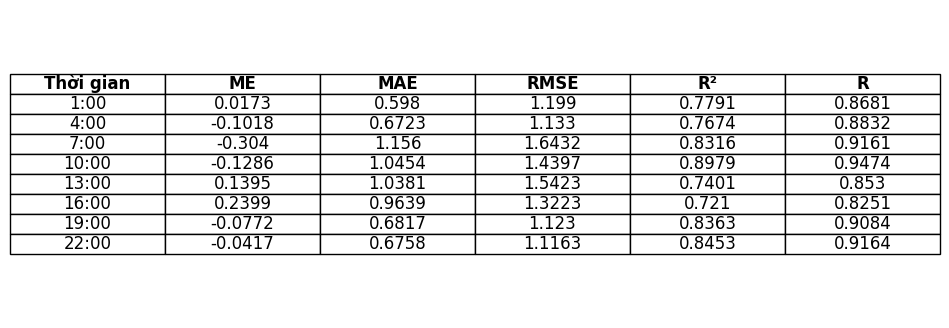

In [19]:
import matplotlib.pyplot as plt

# Làm tròn các giá trị đến 2 chữ số
results_df = results_df.round(4)

# Tạo một hình ảnh để vẽ bảng
fig, ax = plt.subplots(figsize=(10, 4))  # Thay đổi kích thước theo nhu cầu
ax.axis('off')  # Ẩn trục

# Hiển thị DataFrame như một bảng
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, loc='center', cellLoc='center', rowLoc='center')

# Tùy chỉnh kiểu dáng của bảng
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Tăng kích thước bảng nếu cần

# In đậm chữ dòng đầu tiên (tiêu đề cột)
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Dòng đầu tiên (tiêu đề cột)
        cell.set_text_props(fontweight='bold')

# Lưu bảng thành ảnh
plt.savefig('results_table.png', bbox_inches='tight', dpi=300)

plt.show()

In [20]:
# Kết quả tổng hợp
results = []

# Lặp qua từng cặp y_true và y_pred để tính toán các chỉ số trên toàn bộ dữ liệu
for true_col, pred_col in zip(y_test, y_predic):
    # Dữ liệu cho tất cả các giờ trong selected_hours
    data_all = data_filtered[(~data_filtered[true_col].isna()) & (~data_filtered[pred_col].isna())]
    
    if not data_all.empty:
        # Tính toán các chỉ số trên toàn bộ dữ liệu
        metrics = calculate_metrics(data_all[true_col], data_all[pred_col])
        results.append([true_col] + metrics)

# Tạo DataFrame kết quả
columns_names = ['Mục tiêu', 'ME', 'MAE', 'RMSE', 'R²', 'R']
results_df = pd.DataFrame(results, columns=columns_names)
results_df['Mục tiêu'] = results_df['Mục tiêu'].str.replace('_next_hour', '', regex=False)
results_df['Mục tiêu'] = results_df['Mục tiêu'].str.replace('_', ' ').str.title()

# In ra bảng các hàm đánh giá trung bình 24 giờ cho từng mục tiêu
print("Bảng tổng hợp các hàm đánh giá trung bình 24 giờ:")
print(results_df)

Bảng tổng hợp các hàm đánh giá trung bình 24 giờ:
        Mục tiêu        ME       MAE      RMSE        R²         R
0  Precipitation -0.036237  0.278091  0.783773  0.465978  0.685478
1    Temperature  0.131202  0.409603  0.594415  0.985747  0.993203
2       Humidity -0.191171  1.874028  2.673537  0.970237  0.985107


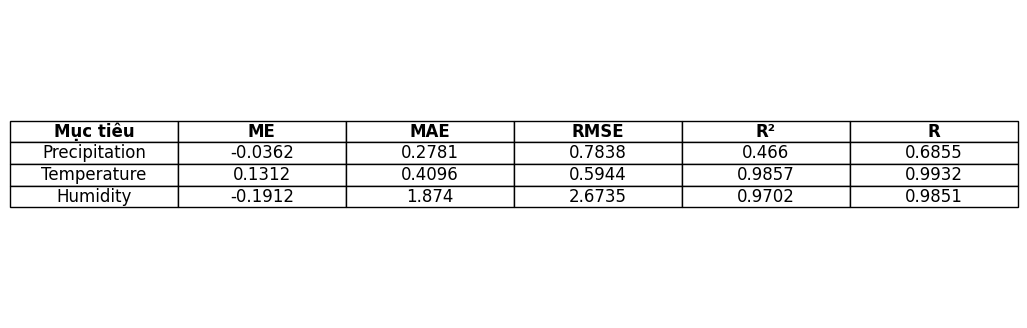

In [21]:
import matplotlib.pyplot as plt

# Làm tròn các giá trị đến 2 chữ số
results_df = results_df.round(4)

# Tạo một hình ảnh để vẽ bảng
fig, ax = plt.subplots(figsize=(10, 4))  # Thay đổi kích thước theo nhu cầu
ax.axis('off')  # Ẩn trục

# Hiển thị DataFrame như một bảng
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, loc='center', cellLoc='center', rowLoc='center')

# Tùy chỉnh kiểu dáng của bảng
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.3, 1.3)  # Tăng kích thước bảng nếu cần

# In đậm chữ dòng đầu tiên (tiêu đề cột)
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Dòng đầu tiên (tiêu đề cột)
        cell.set_text_props(fontweight='bold')

# Lưu bảng thành ảnh
plt.savefig('results_table_2.png', bbox_inches='tight', dpi=300)

plt.show()

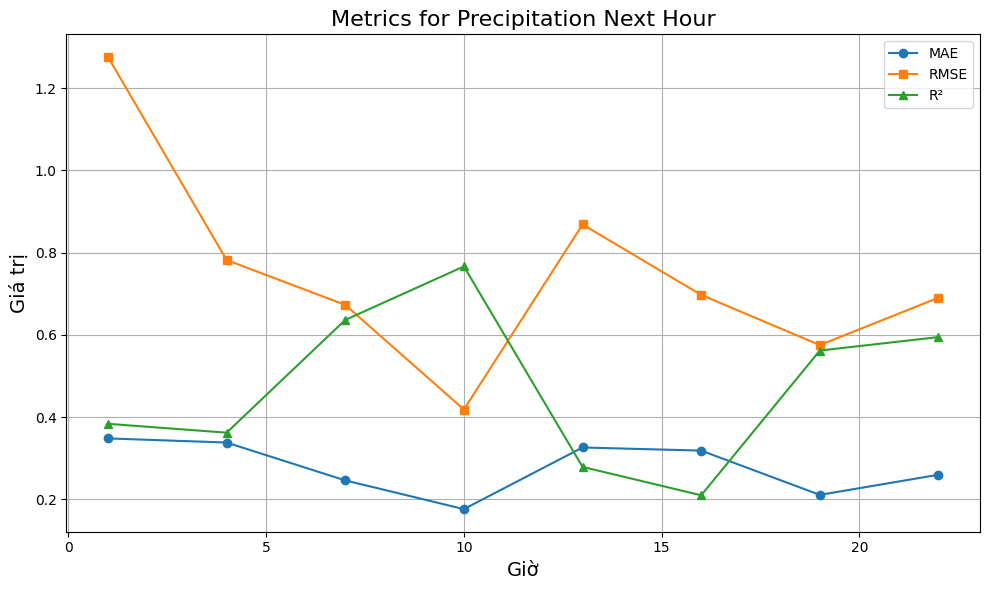

<Figure size 640x480 with 0 Axes>

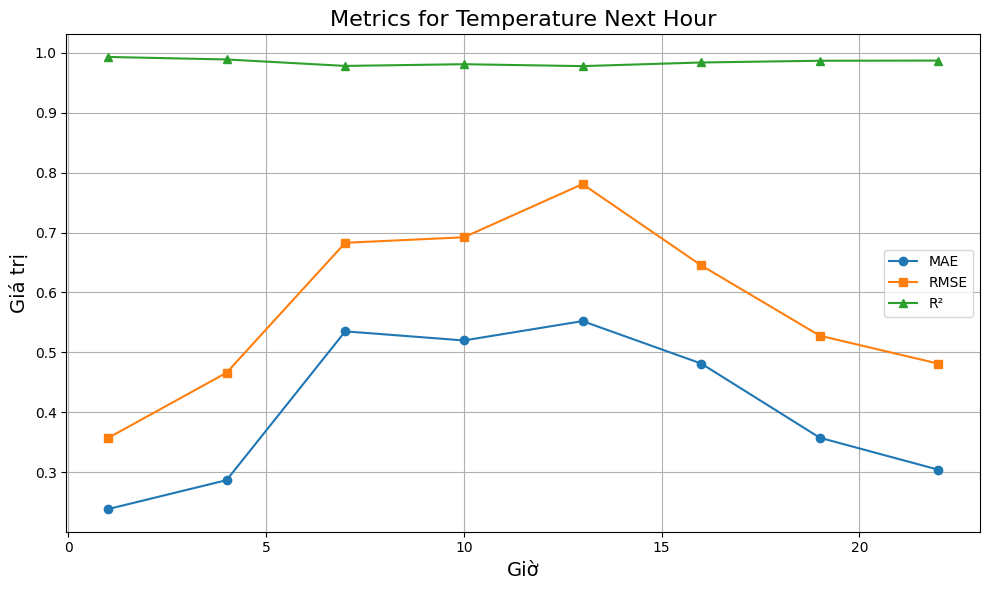

<Figure size 640x480 with 0 Axes>

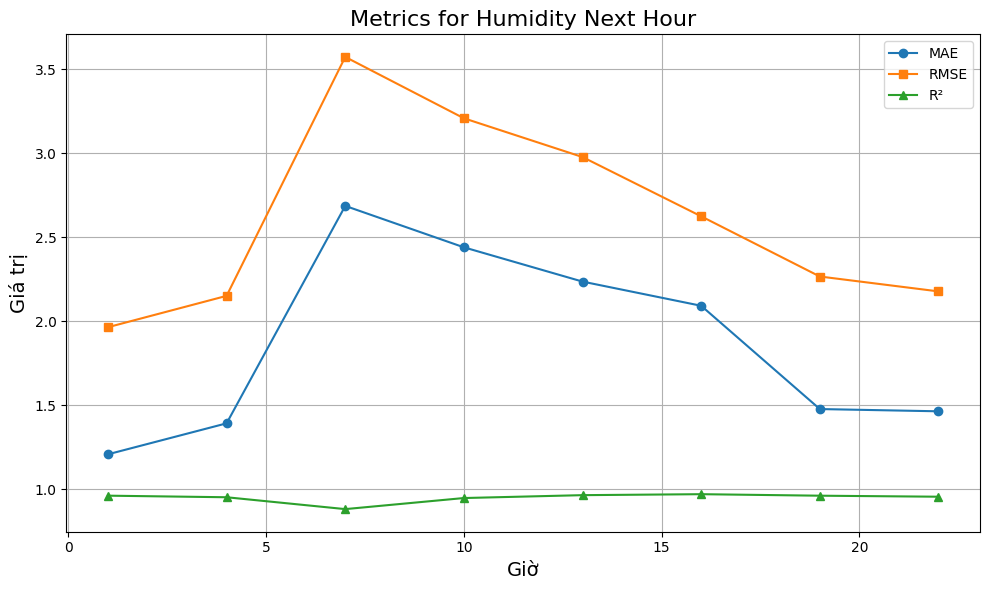

<Figure size 640x480 with 0 Axes>

In [22]:
# Kết quả tổng hợp
results = []

# Lặp qua từng giờ trong selected_hours
for hour in selected_hours:
    # Dữ liệu cho giờ cụ thể
    data_hour = data_filtered[data_filtered['hour'] == hour]
    
    # Lặp qua từng cặp y_true và y_pred
    for true_col, pred_col in zip(y_test, y_predic):
        # Tính toán các chỉ số
        if not data_hour[true_col].empty and not data_hour[pred_col].empty:  # Kiểm tra dữ liệu không rỗng
            metrics = calculate_metrics(data_hour[true_col], data_hour[pred_col])
            results.append([hour, true_col] + metrics)

# Tạo DataFrame kết quả
columns_names = ['Giờ', 'Mục tiêu', 'ME', 'MAE', 'RMSE', 'R²', 'R']
results_df = pd.DataFrame(results, columns=columns_names)

# Vẽ biểu đồ cho từng mục tiêu
for target in y_test:
    target_data = results_df[results_df['Mục tiêu'] == target]
    
    plt.figure(figsize=(10, 6))
    plt.plot(target_data['Giờ'], target_data['MAE'], label='MAE', marker='o')
    plt.plot(target_data['Giờ'], target_data['RMSE'], label='RMSE', marker='s')
    plt.plot(target_data['Giờ'], target_data['R²'], label='R²', marker='^')
    plt.title(f"Metrics for {target.replace('_', ' ').title()}", fontsize=16)
    plt.xlabel("Giờ", fontsize=14)
    plt.ylabel("Giá trị", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    filename = f"metrics_{target}.png" 
    plt.savefig(filename, dpi=300, bbox_inches='tight')


In [23]:
features = ['temperature', 'pressure', 'wind_speed', 'cloud', 'dew_point', 
           'sea_level_pressure', 'wind_direction', 'solar_rad', 'precipitation','humidity','hour','day','month']
target = ['precipitation_next_hour', 'temperature_next_hour', 'humidity_next_hour']

# Split into test and train
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=12345)
train_data = full_data[full_data['datetime'] < '2023-02-01 00:00:00']
test_data = full_data[full_data['datetime'] >= '2023-02-01 00:00:00']
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]



from sklearn.model_selection import train_test_split

# Chia thêm tập train thành train và validation
X_train_full, X_val, y_train_full, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=12345
)


def objective(trial):
    # Các tham số được tối ưu hóa
    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    # Khởi tạo mô hình với các tham số hiện tại
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=12345,
        n_jobs=-1
    )
    
    # Huấn luyện mô hình trên tập train_full
    model.fit(X_train_full, y_train_full)
    
    # Dự đoán trên tập validation
    y_val_pred = model.predict(X_val)
    
    # Tính toán MSE trên tập validation
    mse = mean_squared_error(y_val, y_val_pred)
    return mse

# Khởi tạo nghiên cứu Optuna
study = optuna.create_study(direction='minimize')

# Chạy tối ưu hóa với số vòng lặp nhất định
study.optimize(objective, n_trials=20)

# In ra tham số tốt nhất
print("Best parameters found: ", study.best_params)

# Đánh giá mô hình tốt nhất
best_model = RandomForestRegressor(
    n_estimators=study.best_params['n_estimators'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf'],
    max_features=study.best_params['max_features'],
    random_state=12345,
    n_jobs=-1
)
best_model.fit(X_train_full, y_train_full)
y_pred_best = best_model.predict(X_test)

# In ra các chỉ số đánh giá hồi quy
print("Evaluation on test set:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_best):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_best):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_best):.2f}")

[I 2024-12-03 23:52:32,721] A new study created in memory with name: no-name-19100b76-4a85-492c-a593-2fc929c2d9da
[I 2024-12-03 23:52:34,875] Trial 0 finished with value: 2.358605991233887 and parameters: {'n_estimators': 141, 'max_depth': 41, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 2.358605991233887.
[I 2024-12-03 23:52:38,007] Trial 1 finished with value: 2.5914935022338446 and parameters: {'n_estimators': 270, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 2.358605991233887.
[I 2024-12-03 23:52:49,929] Trial 2 finished with value: 2.3587455748516066 and parameters: {'n_estimators': 252, 'max_depth': 42, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 0 with value: 2.358605991233887.
[I 2024-12-03 23:52:52,134] Trial 3 finished with value: 2.490287423459192 and parameters: {'n_estimators': 175, 'max_depth': 36, 'min_samp

Best parameters found:  {'n_estimators': 299, 'max_depth': 39, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}
Evaluation on test set:
Mean Squared Error (MSE): 2.91
Mean Absolute Error (MAE): 0.88
R² Score: 0.80


In [24]:
model_4 = best_model

In [29]:
y_pred = model_4.predict(test_data_3[features].tail(12))
y_test = test_data_3[target].tail(12)

In [28]:
print("Evaluation on test set:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, pred_3[-12:]):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, pred_3[-12:]):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

Evaluation on test set:
Mean Squared Error (MSE): 10.53
Mean Absolute Error (MAE): 2.04
R² Score: 0.69


Evaluation on test set:
Mean Squared Error (MSE): 17.04
Mean Absolute Error (MAE): 2.67
R² Score: 0.56


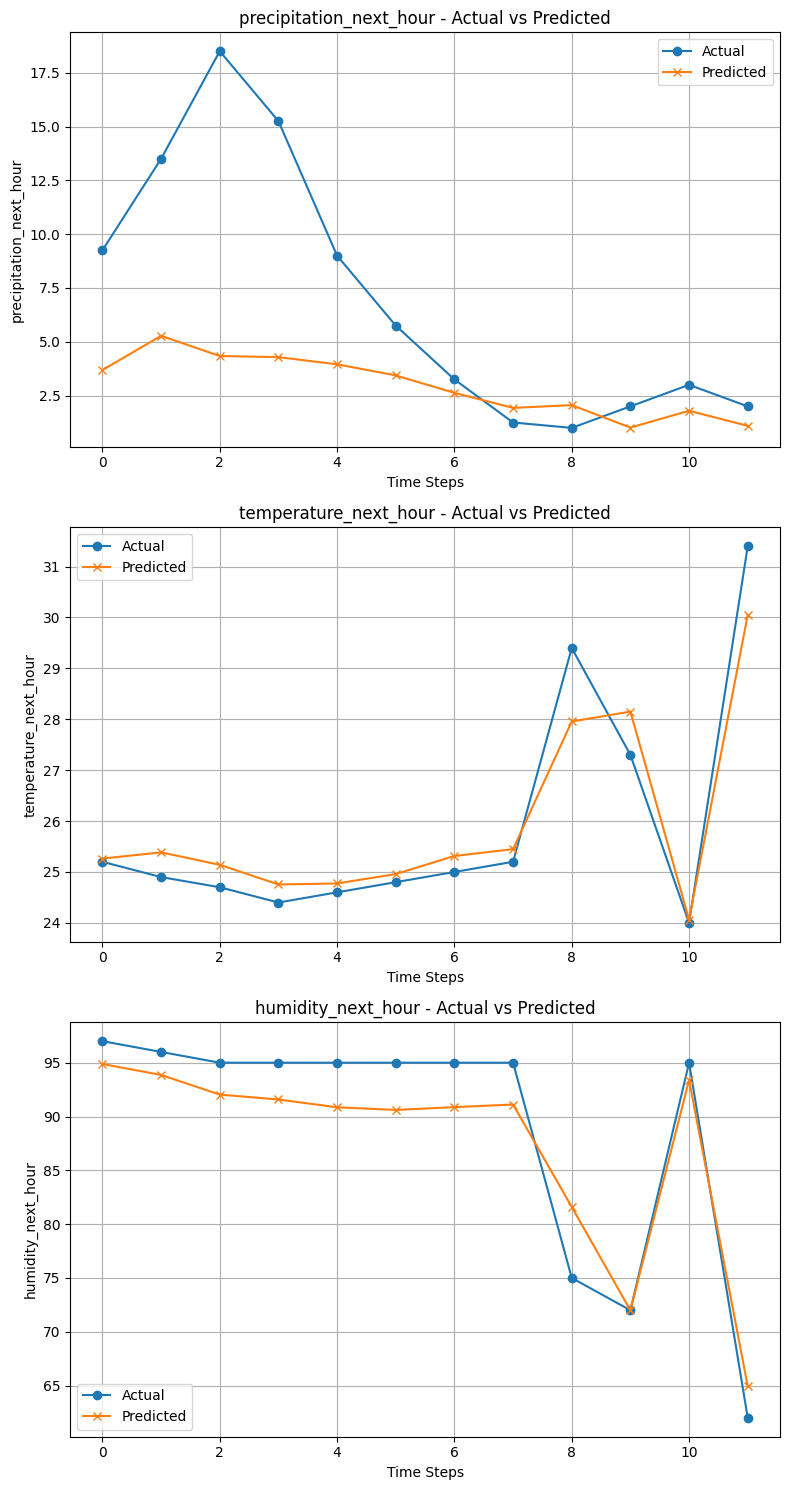

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Chuyển y_test và y_pred về dạng DataFrame để dễ xử lý (nếu y là nhiều mục tiêu)
y_test = y_test.reset_index(drop=True)
y_pred = np.array(y_pred)

# Đánh giá mô hình
print("Evaluation on test set:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

# Tên các mục tiêu
target_columns = y_test.columns if hasattr(y_test, 'columns') else ["Target"]

# Vẽ biểu đồ
fig, axes = plt.subplots(len(target_columns), 1, figsize=(8, 5 * len(target_columns)))
if len(target_columns) == 1:
    axes = [axes]  # Đảm bảo axes luôn là danh sách

for i, target_name in enumerate(target_columns):
    ax = axes[i]
    ax.plot(y_test.iloc[:, i], label="Actual", marker='o')
    ax.plot(y_pred[:, i], label="Predicted", marker='x')
    ax.set_title(f"{target_name} - Actual vs Predicted")
    ax.set_xlabel("Time Steps")
    ax.set_ylabel(target_name)
    ax.legend()
    ax.grid()

plt.tight_layout()

# Lưu từng biểu đồ con vào file riêng biệt
for i, target_name in enumerate(target_columns):
    fig_i, ax_i = plt.subplots(figsize=(8, 5))
    ax_i.plot(y_test.iloc[:, i], label="Actual", marker='o')
    ax_i.plot(y_pred[:, i], label="Predicted", marker='x')
    ax_i.set_title(f"{target_name} - Actual vs Predicted")
    ax_i.set_xlabel("Time Steps")
    ax_i.set_ylabel(target_name)
    ax_i.legend()
    ax_i.grid()
    fig_i.savefig(f'{target_name.replace(" ", "_")}_plot.png')  # Lưu với tên file dựa trên tên mục tiêu
    plt.close(fig_i)

plt.show()
